In [2]:

import warnings
warnings.filterwarnings('ignore')

Importing the libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


Reading the file

In [4]:
vdata = pd.read_csv("data.csv")

Understanding the Data

In [5]:
vdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
vdata.head(1)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587


Cleaning the data

In [7]:
vdata["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
vdata = vdata[vdata['horsepower'] != "?" ]

In [9]:
vdata = vdata.reset_index(drop = True)

In [10]:
vdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    object 
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 27.7+ KB


In [11]:
vdata["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:


vdata.head(1)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587


In [13]:
vdata["horsepower"] = vdata["horsepower"].astype(int)

In [14]:
vdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    int64  
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


Finding the relevant attributes by correlation factor


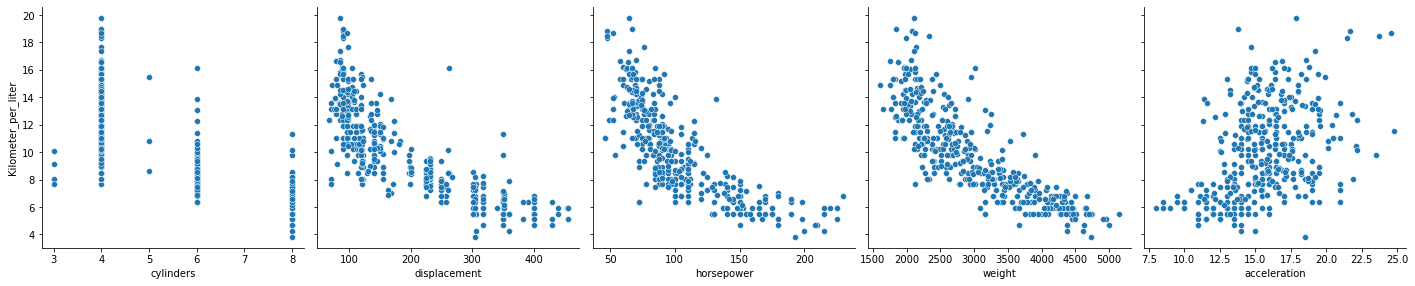

In [15]:
sns.pairplot(vdata, x_vars=['cylinders', 'displacement', 'horsepower','weight','acceleration'], y_vars='Kilometer_per_liter',size=4, aspect=1, kind='scatter')
plt.show()

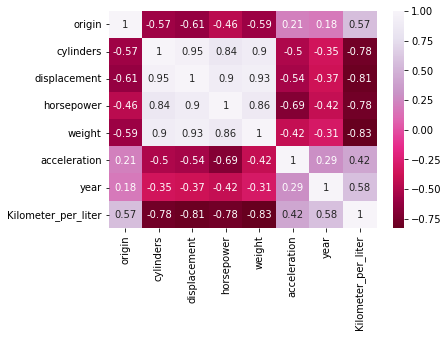

In [18]:
sns.heatmap(vdata.corr(),cmap="PuRd_r",annot = True)
plt.show()

In [19]:
vdata.head(1)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587


creating x and y 

In [20]:
x = vdata["weight"]
y = vdata["Kilometer_per_liter"]

Splitting the data using train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 1500)

In [22]:
x_train.head()

91     4363
26     4376
73     4294
316    2711
18     2130
Name: weight, dtype: int64

In [23]:
x_train.shape

(274,)

In [24]:
y_train.shape

(274,)

Calling the model


In [25]:
lr = LinearRegression()

adding the constant to get intercept 

In [26]:
import statsmodels.api as sm

In [27]:
x_train_sm = sm.add_constant(x_train)

Fitting the model

In [28]:
lr = sm.OLS(y_train, x_train_sm).fit()

In [29]:
x_train_sm.head()

,const,weight
91,1.0,4363
26,1.0,4376
73,1.0,4294
316,1.0,2711
18,1.0,2130


In [30]:
lr.params

const     19.356189
weight    -0.003168
dtype: float64

In [31]:
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.680
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     578.9
Date:                 Tue, 30 Aug 2022   Prob (F-statistic):           2.52e-69
Time:                         08:16:49   Log-Likelihood:                -557.50
No. Observations:                  274   AIC:                             1119.
Df Residuals:                      272   BIC:                             1126.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3562      0.408     47.45

plotting the linear regression


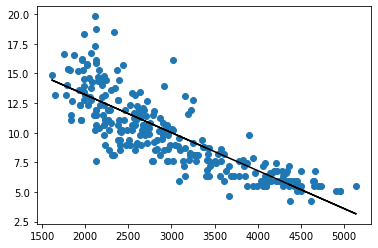

In [34]:
plt.scatter(x_train,y_train)
plt.plot(x_train,19.6+(-0.0032)*x_train, 'black')
plt.show()

Predictions on the Test Set

In [35]:
x_test_sm = sm.add_constant(x_test)


y_pred = lr.predict(x_test_sm)

checking the values of r2 and rmse

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.8116414182609155

In [38]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7165349695132656

Visualizing the fit on the test set

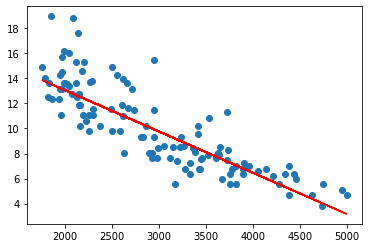

In [39]:
plt.scatter(x_test, y_test)
plt.plot(x_test,19.665903+(-0.0033)*x_test, 'r')
plt.show()

Bivariant

In [40]:
xx = vdata[["weight","horsepower"]]
yy = vdata["Kilometer_per_liter"]

In [41]:
xx_train,xx_test,yy_train,yy_test = train_test_split(xx,yy,test_size=0.3,random_state = 1500)


In [42]:
lr = LinearRegression()

In [43]:
import statsmodels.api as sm

In [44]:
xx_train_sm = sm.add_constant(xx_train)

In [45]:
lr = sm.OLS(yy_train, xx_train_sm).fit()

In [46]:
lr.params

const         19.111408
weight        -0.002359
horsepower    -0.020480
dtype: float64

In [47]:
xx_test_sm = sm.add_constant(xx_test)


yy_pred = lr.predict(xx_test_sm)

In [48]:
np.sqrt(mean_squared_error(yy_test, yy_pred))

1.780043216024369

In [49]:
r_squared = r2_score(yy_test, yy_pred)
r_squared

0.7263369893914138